# Дискретное всплеск-преобразование

ДВП осуществляется с помощью банка фильтров (англ. filter bank), который состоит из набора масштабирующих и всплеск-масок. Это просто набор из нескольких массивов с коэффициентами. Получить экземпляр класса с тем или иным банком фильтров для ДВП можно командой

    pywt.Wavelet(waveletname)

где `waveletname` является названием семейства всплесков для ДВП.

Названия семейств можно получить используя команды ниже:

In [1]:
import pywt
import matplotlib.pyplot as plt

print(pywt.families(short=False))
print(pywt.families(short=True))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']
['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']


Получить набор коэффициентов банка фильтров для выбранной системы всплесков можно командой

    wavelet = pywt.Wavelet(waveletname)
    [dec_lo, dec_hi, rec_lo, rec_hi] = wavelet.filter_bank

In [2]:
wavelet = pywt.Wavelet('db2')
[dec_lo, dec_hi, rec_lo, rec_hi] = wavelet.filter_bank
print(wavelet)
print("Коэффициенты разложения НЧ:", dec_lo)
print("Коэффициенты разложения ВЧ:", dec_hi)
print("Коэффициенты восстановления НЧ:", rec_lo)
print("Коэффициенты восстановления ВЧ:", rec_hi)

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Коэффициенты разложения НЧ: [-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416]
Коэффициенты разложения ВЧ: [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]
Коэффициенты восстановления НЧ: [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037]
Коэффициенты восстановления ВЧ: [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]


Получить отсчёты для построения графиков масштабирующей функции и всплеск-функции можно командой:

    psi_function, phi_function, x_values = wavelet.wavefun()

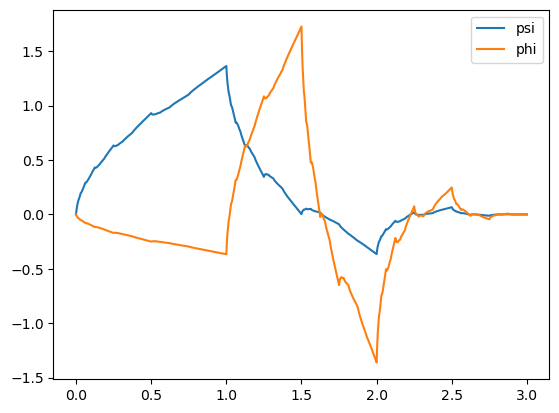

In [3]:
wavelet = pywt.Wavelet('db2')
psi_function, phi_function, x_values = wavelet.wavefun()
plt.plot(x_values, psi_function)
plt.plot(x_values, phi_function)
plt.legend(["psi","phi"])

Выведем графики некоторых функций, порождающих системы всплесков.

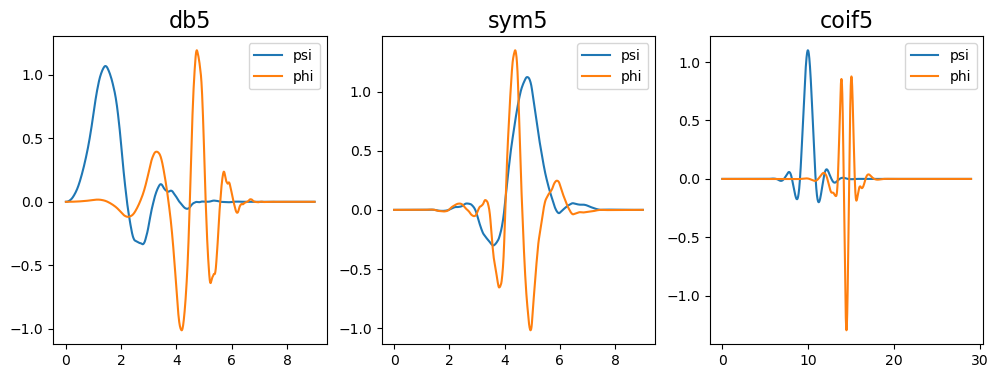

In [12]:
# Дискретные всплески
discrete_wavelets = ['db5', 'sym5', 'coif5']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
for ind, waveletname in enumerate(discrete_wavelets):
   
    wavelet = pywt.Wavelet(waveletname)
    psi_function, phi_function, x_values = wavelet.wavefun()
    ax[ind].plot(x_values, psi_function)
    ax[ind].plot(x_values, phi_function)
    ax[ind].legend(["psi","phi"])
    ax[ind].set_title("{}".format(waveletname), fontsize=16)

Выведем также графики базовых всплесков семейства Добеши.

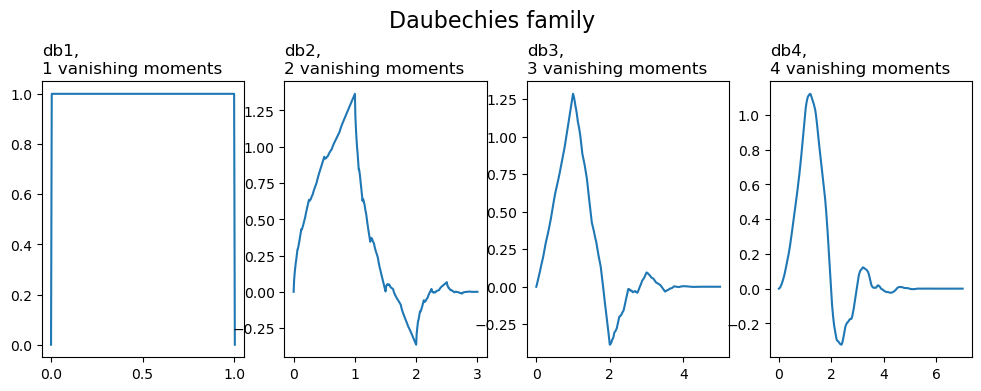

In [13]:
db_wavelets = pywt.wavelist('db')[:4]
 
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,4))
fig.suptitle('Daubechies family', fontsize=16)
for ind, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    wavelet_function = wavelet.wavefun()[0]
    x_values = wavelet.wavefun()[-1]
    ax[ind].plot(x_values, wavelet_function)
    ax[ind].set_title("{},\n{} vanishing moments".format(waveletname,no_moments), fontsize=12, loc='left')
plt.subplots_adjust(top=0.8)

### Пример разложения сигнала по всплескам

Рассмотрим способ применения ДВП к сигналу. На графиках выведем коэффициенты разложения: приближение и детали.
В PyWavelets ДВП применяется с помощью 

    `pywt.dwt(signal, waveletname)`
    
Этот метод возвращает два набора коэффициентов: приближения и детали.
    Применив ДВП к коэффициентам приближения предыдущего ДВП, мы получаем всплеск-преобразование следующего уровня.
    На каждом следующем уровне исходный сигнал по длине уменьшается в 2 раза.

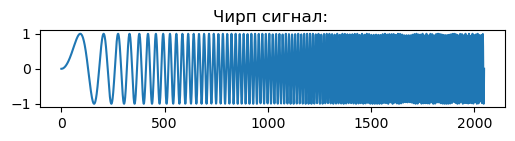

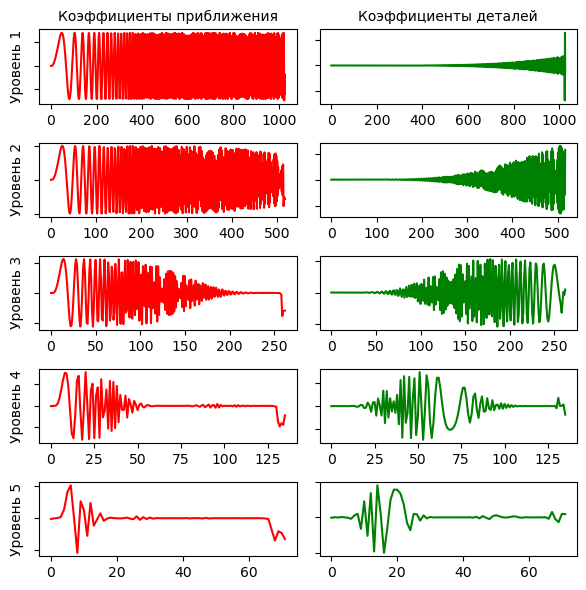

In [15]:
import numpy as np
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(2 * np.pi * (125 * x) * x)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Чирп сигнал: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    # ДВП
    (data, coeff_d) = pywt.dwt(data, waveletname)
    
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Уровень {}".format(ii + 1), fontsize=10, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Коэффициенты приближения", fontsize=10)
        axarr[ii, 1].set_title("Коэффициенты деталей", fontsize=10)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

Метод `pywt.wavedec()` позволяет сразу проделать ДВП до указанного уровня.

In [17]:
coeffs = pywt.wavedec(chirp_signal, 'db5', level=5)

cA5, cD5, cD4, cD3, cD2, cD1 = coeffs

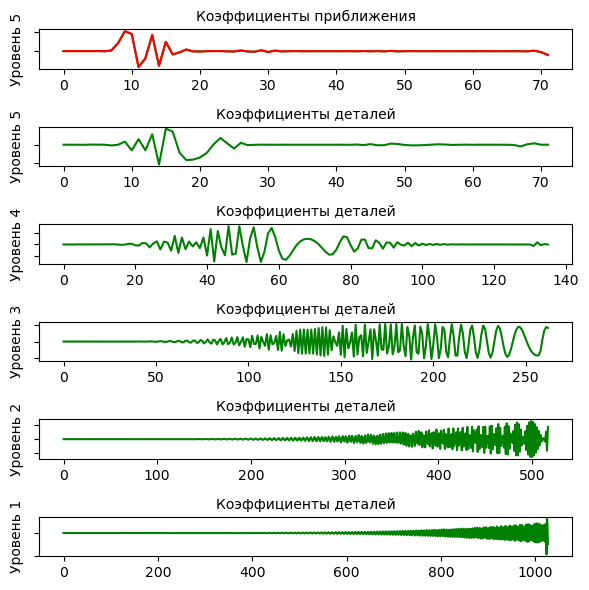

In [25]:
fig, axarr = plt.subplots(nrows=6, ncols=1, figsize=(6,6))
for ind, coef in enumerate(coeffs):    
    axarr[ind].plot(coef,'g')

    axarr[ind].set_ylabel("Уровень {}".format(6-ind), fontsize=10, rotation=90)
    axarr[ind].set_yticklabels([])
    axarr[ind].set_title("Коэффициенты деталей", fontsize=10)
    if ind == 0:
        axarr[ind].plot(coef, 'r')
        axarr[ind].set_ylabel("Уровень {}".format(5), fontsize=10, rotation=90)
        axarr[ind].set_title("Коэффициенты приближения", fontsize=10)
        
    axarr[ind].set_yticklabels([])
plt.tight_layout()
plt.show()

### Сжатие

Рассмотрим качество сжатия изображений с помощью ДВП.

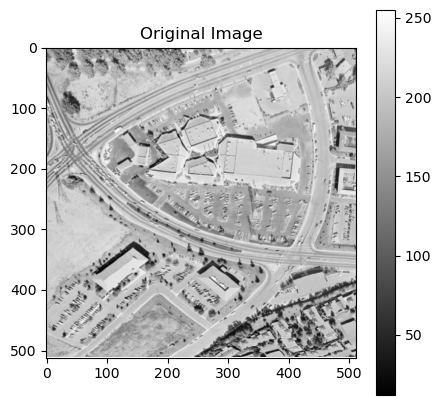

In [1]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.util import img_as_ubyte, img_as_float

#img = data.camera()
img = img_as_ubyte(plt.imread('source/arial_image.png'))

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()

Проведём ДВП этого изображения.

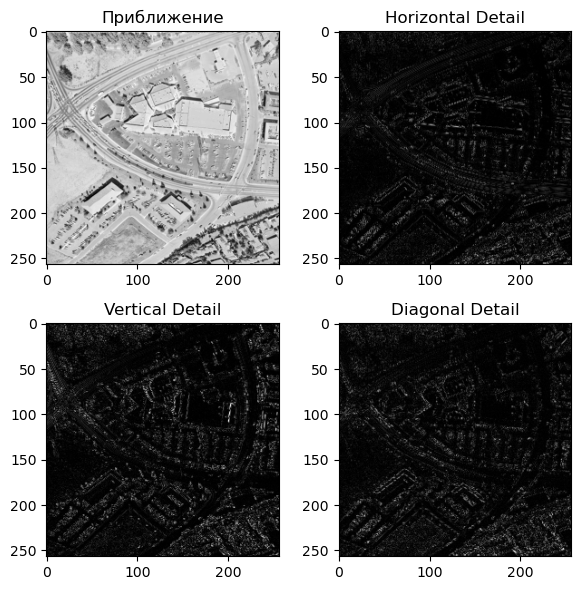

In [2]:
# ДВП на 1 уровень
coeffs = pywt.wavedec2(img, 'db2', level=1)
cA, (cH, cV, cD) = coeffs

plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(np.abs(cA), cmap='gray')
plt.title("Приближение")

plt.subplot(2, 2, 2)
plt.imshow(np.abs(cH), cmap='gray')
plt.title("Horizontal Detail")

plt.subplot(2, 2, 3)
plt.imshow(np.abs(cV), cmap='gray')
plt.title("Vertical Detail")

plt.subplot(2, 2, 4)
plt.imshow(np.abs(cD), cmap='gray')
plt.title("Diagonal Detail")

plt.tight_layout()
plt.show()


Проведём более глубокое ДВП, полученные коэффициенты обнулим по порогу и выполним обратное ДВП.

In [3]:
img = img_as_ubyte(plt.imread('source/arial_image.png'))
#img = data.camera()

#img = img.astype(np.float32) - 128.0
coeffs = pywt.wavedec2(img, 'db4', level=4, mode = 'reflect')

Коэффициенты ДВП возвращаются в виде некоторой структуры. Для работы с этой структурой переведём её в единый массив. Это можно сделать методом

    pywt.coeffs_to_array()

In [4]:
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
# arr - массив с коэффициентами
# coeff_slices - информация, как по массиву восстановить исходную структуру
print(arr.shape)

(538, 538)


In [5]:
coeff_slices

[(slice(None, 38, None), slice(None, 38, None)),
 {'ad': (slice(None, 38, None), slice(38, 76, None)),
  'da': (slice(38, 76, None), slice(None, 38, None)),
  'dd': (slice(38, 76, None), slice(38, 76, None))},
 {'ad': (slice(None, 70, None), slice(76, 146, None)),
  'da': (slice(76, 146, None), slice(None, 70, None)),
  'dd': (slice(76, 146, None), slice(76, 146, None))},
 {'ad': (slice(None, 133, None), slice(146, 279, None)),
  'da': (slice(146, 279, None), slice(None, 133, None)),
  'dd': (slice(146, 279, None), slice(146, 279, None))},
 {'ad': (slice(None, 259, None), slice(279, 538, None)),
  'da': (slice(279, 538, None), slice(None, 259, None)),
  'dd': (slice(279, 538, None), slice(279, 538, None))}]

Определим порог для обнуления коэффициентов. В переменной `percent` можно указать процент коэффициентов, которые останутся не тронутыми (то есть, например, сохраним 10% наибольших по модулю коэффициентов).

In [11]:
percent = 10
# определяем порог
threshold = np.percentile(np.abs(arr.ravel()), 100 - percent)
print(threshold)

arr_thresholded = pywt.threshold(arr, threshold, mode='hard')

31.65068333765079


Можно найти количество нулей в коэффициентах.

In [12]:
values, counts = np.unique(arr_thresholded.ravel(), return_counts=True)
counts[np.where(values == 0.0)]

array([260499], dtype=int64)

In [8]:
538 ** 2

289444

Восстановим изображение.

In [13]:
coeffs_from_arr = pywt.array_to_coeffs(arr_thresholded, coeff_slices, output_format='wavedec2')

compressed_img = pywt.waverec2(coeffs_from_arr, 'db4', mode = 'reflect')

def plot_comparison(img_original, img_filtered, img_title_filtered, figsize=(16, 14)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=figsize, sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Оригинал')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

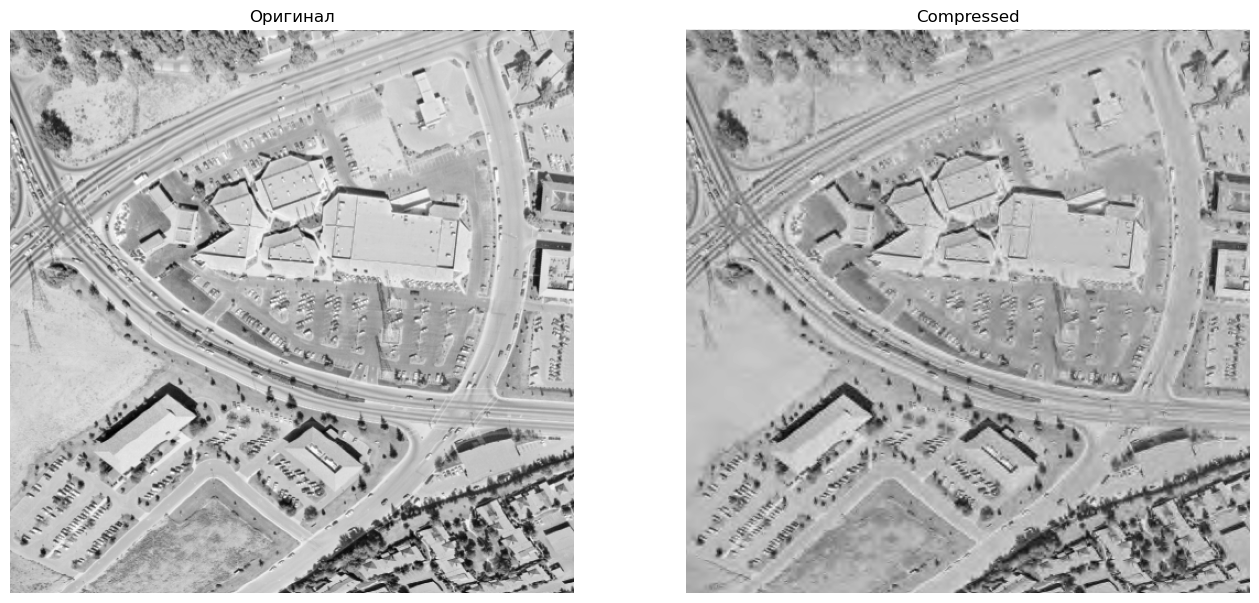

In [14]:
# Plotting the original and compressed images
plot_comparison(img,compressed_img,"Compressed")

In [15]:
from skimage.metrics import peak_signal_noise_ratio 

peak_signal_noise_ratio(img,compressed_img)

C:\Users\AlexK\AppData\Local\Temp\ipykernel_15984\3696710481.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  peak_signal_noise_ratio(img,compressed_img)


29.184141787355166

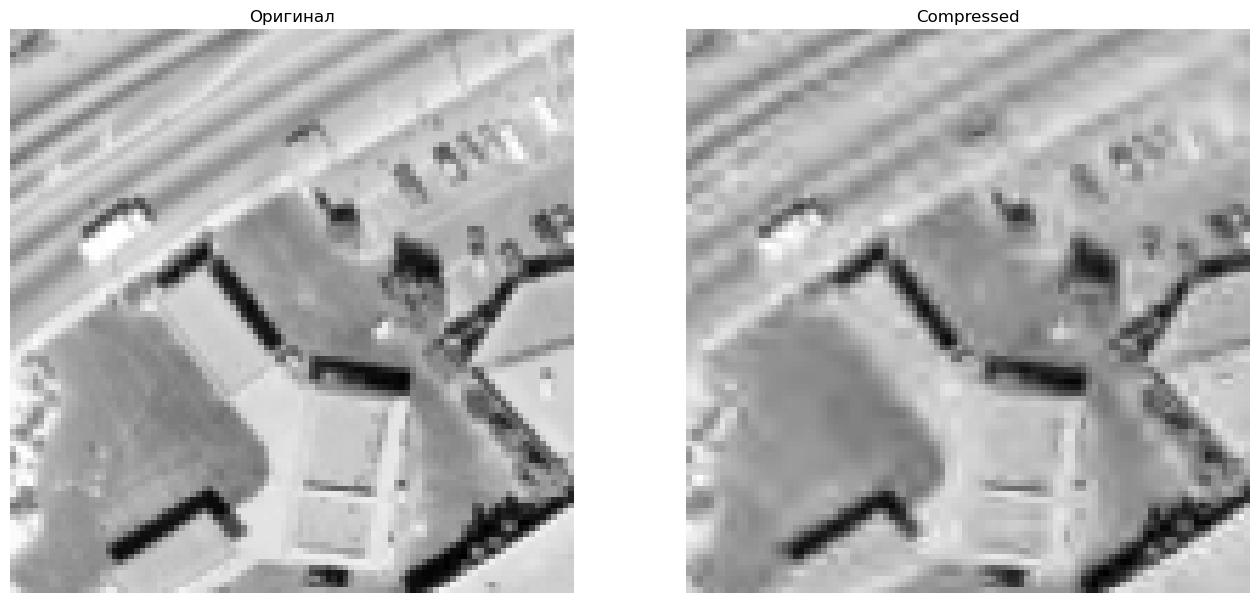

In [16]:
plot_comparison(img[100:200,100:200],compressed_img[100:200,100:200],"Compressed")

In [52]:
def DWT_Compress(img, percent=10, wavename = 'db4', level=4):    
    coeffs = pywt.wavedec2(img, wavename, level=level, mode = 'reflect')
    arr, coeff_slices = pywt.coeffs_to_array(coeffs)
    threshold = np.percentile(np.abs(arr.ravel()), 100 - percent)
    
    arr_thresholded = pywt.threshold(arr, threshold, mode='hard')
    coeffs_from_arr = pywt.array_to_coeffs(arr_thresholded, coeff_slices, output_format='wavedec2')

    compressed_img = pywt.waverec2(coeffs_from_arr, wavename, mode = 'reflect')
    return compressed_img

In [54]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

In [55]:
percent = [1,5,10, 20, 50,75,90]
for p in percent:
    compressed_img = DWT_Compress(img,p)
    print('PSNR: '+str(peak_signal_noise_ratio(img, compressed_img))+', SNR: '+ str(mySNR(img,img-compressed_img)))

PSNR: 20.8569577157923, SNR: -6.685649521487274
PSNR: 25.82594885077217, SNR: -1.7166583865074048
PSNR: 29.184141787355166, SNR: 1.6415345500755865
PSNR: 34.0449716729836, SNR: 6.5023644357040205
PSNR: 46.34380578068842, SNR: 18.801198543408844
PSNR: 59.43427181753346, SNR: 31.891664580253874
PSNR: 78.11350775921036, SNR: 50.57090052193079


C:\Users\AlexK\AppData\Local\Temp\ipykernel_8932\1557601325.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print('PSNR: '+str(peak_signal_noise_ratio(img, compressed_img))+', SNR: '+ str(mySNR(img,img-compressed_img)))


### Денойзинг с помошью ДВП

In [17]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

In [72]:
denoise_wavelet??

Signature:
denoise_wavelet(
    image,
    sigma=None,
    wavelet='db1',
    mode='soft',
    wavelet_levels=None,
    convert2ycbcr=False,
    method='BayesShrink',
    rescale_sigma=True,
    *,
    channel_axis=None,
)
Source:   
@utils.channel_as_last_axis()
def denoise_wavelet(image, sigma=None, wavelet='db1', mode='soft',
                    wavelet_levels=None,
                    convert2ycbcr=False, method='BayesShrink',
                    rescale_sigma=True, *, channel_axis=None):
    """Perform wavelet denoising on an image.

    Parameters
    ----------
    image : ndarray ([M[, N[, ...P]][, C]) of ints, uints or floats
        Input data to be denoised. `image` can be of any numeric type,
        but it is cast into an ndarray of floats for the computation
        of the denoised image.
    sigma : float or list, optional
        The noise standard deviation used when computing the wavelet detail
        coefficient threshold(s). When None (default), the noise standard


Добавим гауссов шум к изображению.

In [75]:
img = img_as_float(data.camera())

sigma = 0.12
img_noisy = random_noise(img, var=sigma**2)

# Для работы одного из алгоритмов требуется оценка дисперсии шума
sigma_est = estimate_sigma(img_noisy, average_sigmas=True)
print(f'Оценка дисперсии шума = {sigma_est}')

Оценка дисперсии шума = 0.11252544651621732


Подавление шума основано на ДВП. В результатах ДВП гауссов шум равномерно распределен по всем коэффициентам с малыми значениями. Этот шум можно удалить по порогу: 

    hard - обнулением всех коэффициентов выше порога
    soft - срезанию всех коэффициентов к нулю на заданную величину.

В методе `denoise_wavelet()` реализовано два разных метода выбора порогового значения: BayesShrink и VisuShrink.

В VisuShrink используется один универсальный порог для всех коэффициентов ДВП. Этот порог удаляет аддитивный гауссов шум с высокой вероятностью, что сильно сглаживает изображение. Это можно улучшить передав в метод сниженную оценку шума

BayesShrink — это адаптивный подход к обработке коэффициентов ДВП, при котором для каждого набора коэффициентов деталей оценивается свой порог. Обычно это приводит к улучшению по сравнению с универсальным порогом.

In [76]:
im_bayes = denoise_wavelet(
    img_noisy,
    method='BayesShrink',
    mode='soft',
)
im_visushrink = denoise_wavelet(
    img_noisy,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est,
)

im_visushrink2 = denoise_wavelet(
    noisy,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 2,
)
im_visushrink4 = denoise_wavelet(
    noisy,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est / 4,
)

psnr_noisy = peak_signal_noise_ratio(original, noisy)
psnr_bayes = peak_signal_noise_ratio(original, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(original, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(original, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(original, im_visushrink4)

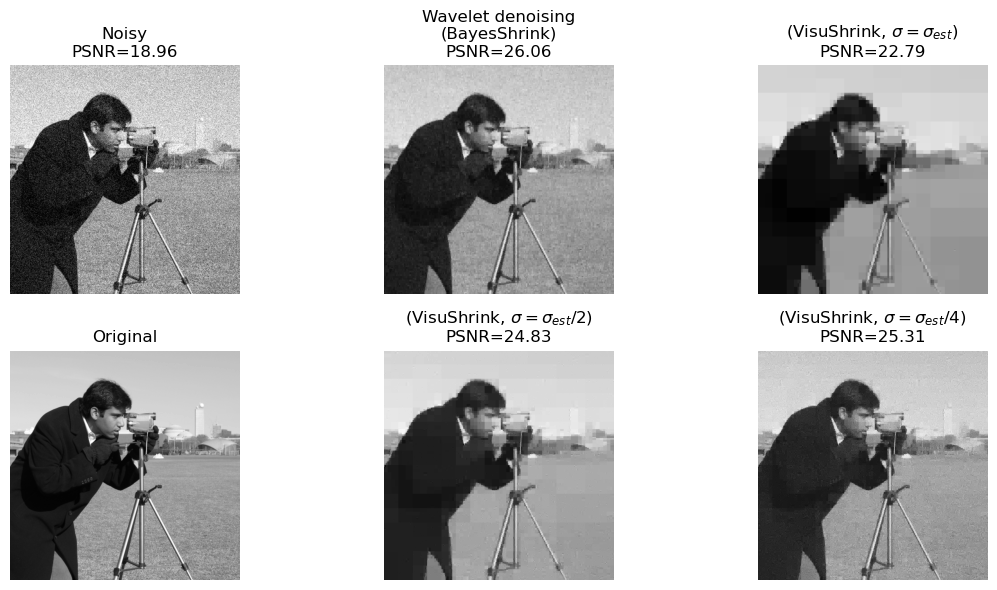

In [79]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 6), sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(img_noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title(f'Noisy\nPSNR={psnr_noisy:0.4g}')
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(f'Wavelet denoising\n(BayesShrink)\nPSNR={psnr_bayes:0.4g}')
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    '(VisuShrink, $\\sigma=\\sigma_{est}$)\n'
    'PSNR=%0.4g' % psnr_visushrink
)
ax[1, 0].imshow(img)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    '(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n'
    'PSNR=%0.4g' % psnr_visushrink2
)
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    '(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n'
    'PSNR=%0.4g' % psnr_visushrink4
)
fig.tight_layout()

plt.show()

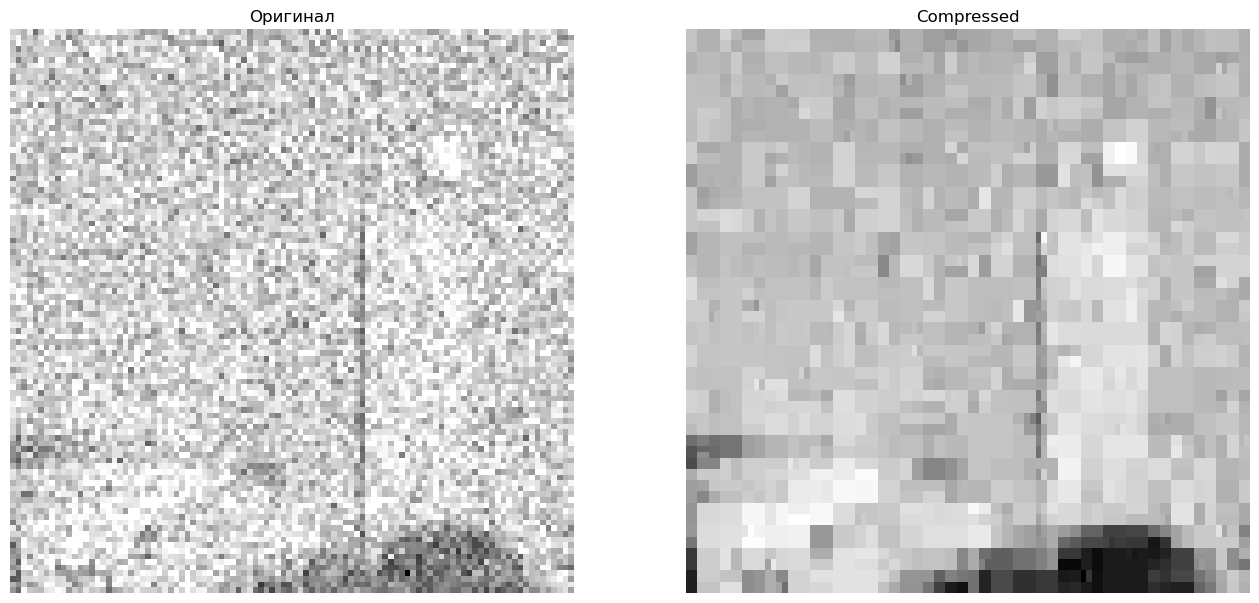

In [81]:
x_start = 100
y_start =350
plot_comparison(img_noisy[x_start:x_start+100,y_start:y_start+100],im_bayes[x_start:x_start+100,y_start:y_start+100],"Compressed")